# Session 13: Column Transformers and Pipelines

in this session we will learn how to use the `ColumnTransformer` to transform columns of a pandas dataframe.

The `ColumnTransformer` is a wrapper around a list of `TransformerMixin` objects, and they allow us to link data transformations within our general data engineering pipeline. By using the `ColumnTransformer` provided by `sklearn`, we can include this elements in our `Pipeline` object.

`Pipeline` objects are a generalization of `ColumnTransformer` objects, and they allow us to link multiple transformations within our general data engineering pipeline.

In the end, with `Pipeline` objects, we can link every data transformation with the train-predict-evaluate cycle.

In [1]:
import numpy as np
import pandas as pd

hotel = pd.read_csv("../datasets/hotel_bookings.csv")

hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


We're going to use the `hotel_bookings` dataset, which contains information about the bookings made in two different hotels:
* https://www.kaggle.com/jessemostipak/hotel-booking-demand

What's inside the data?


In [2]:
hotel.shape

(119390, 32)

In [3]:
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [4]:
# aggregate columns by type
object_features = hotel.select_dtypes(include=["object"])
numeric_features = hotel.select_dtypes(include=["int64", "float64"])

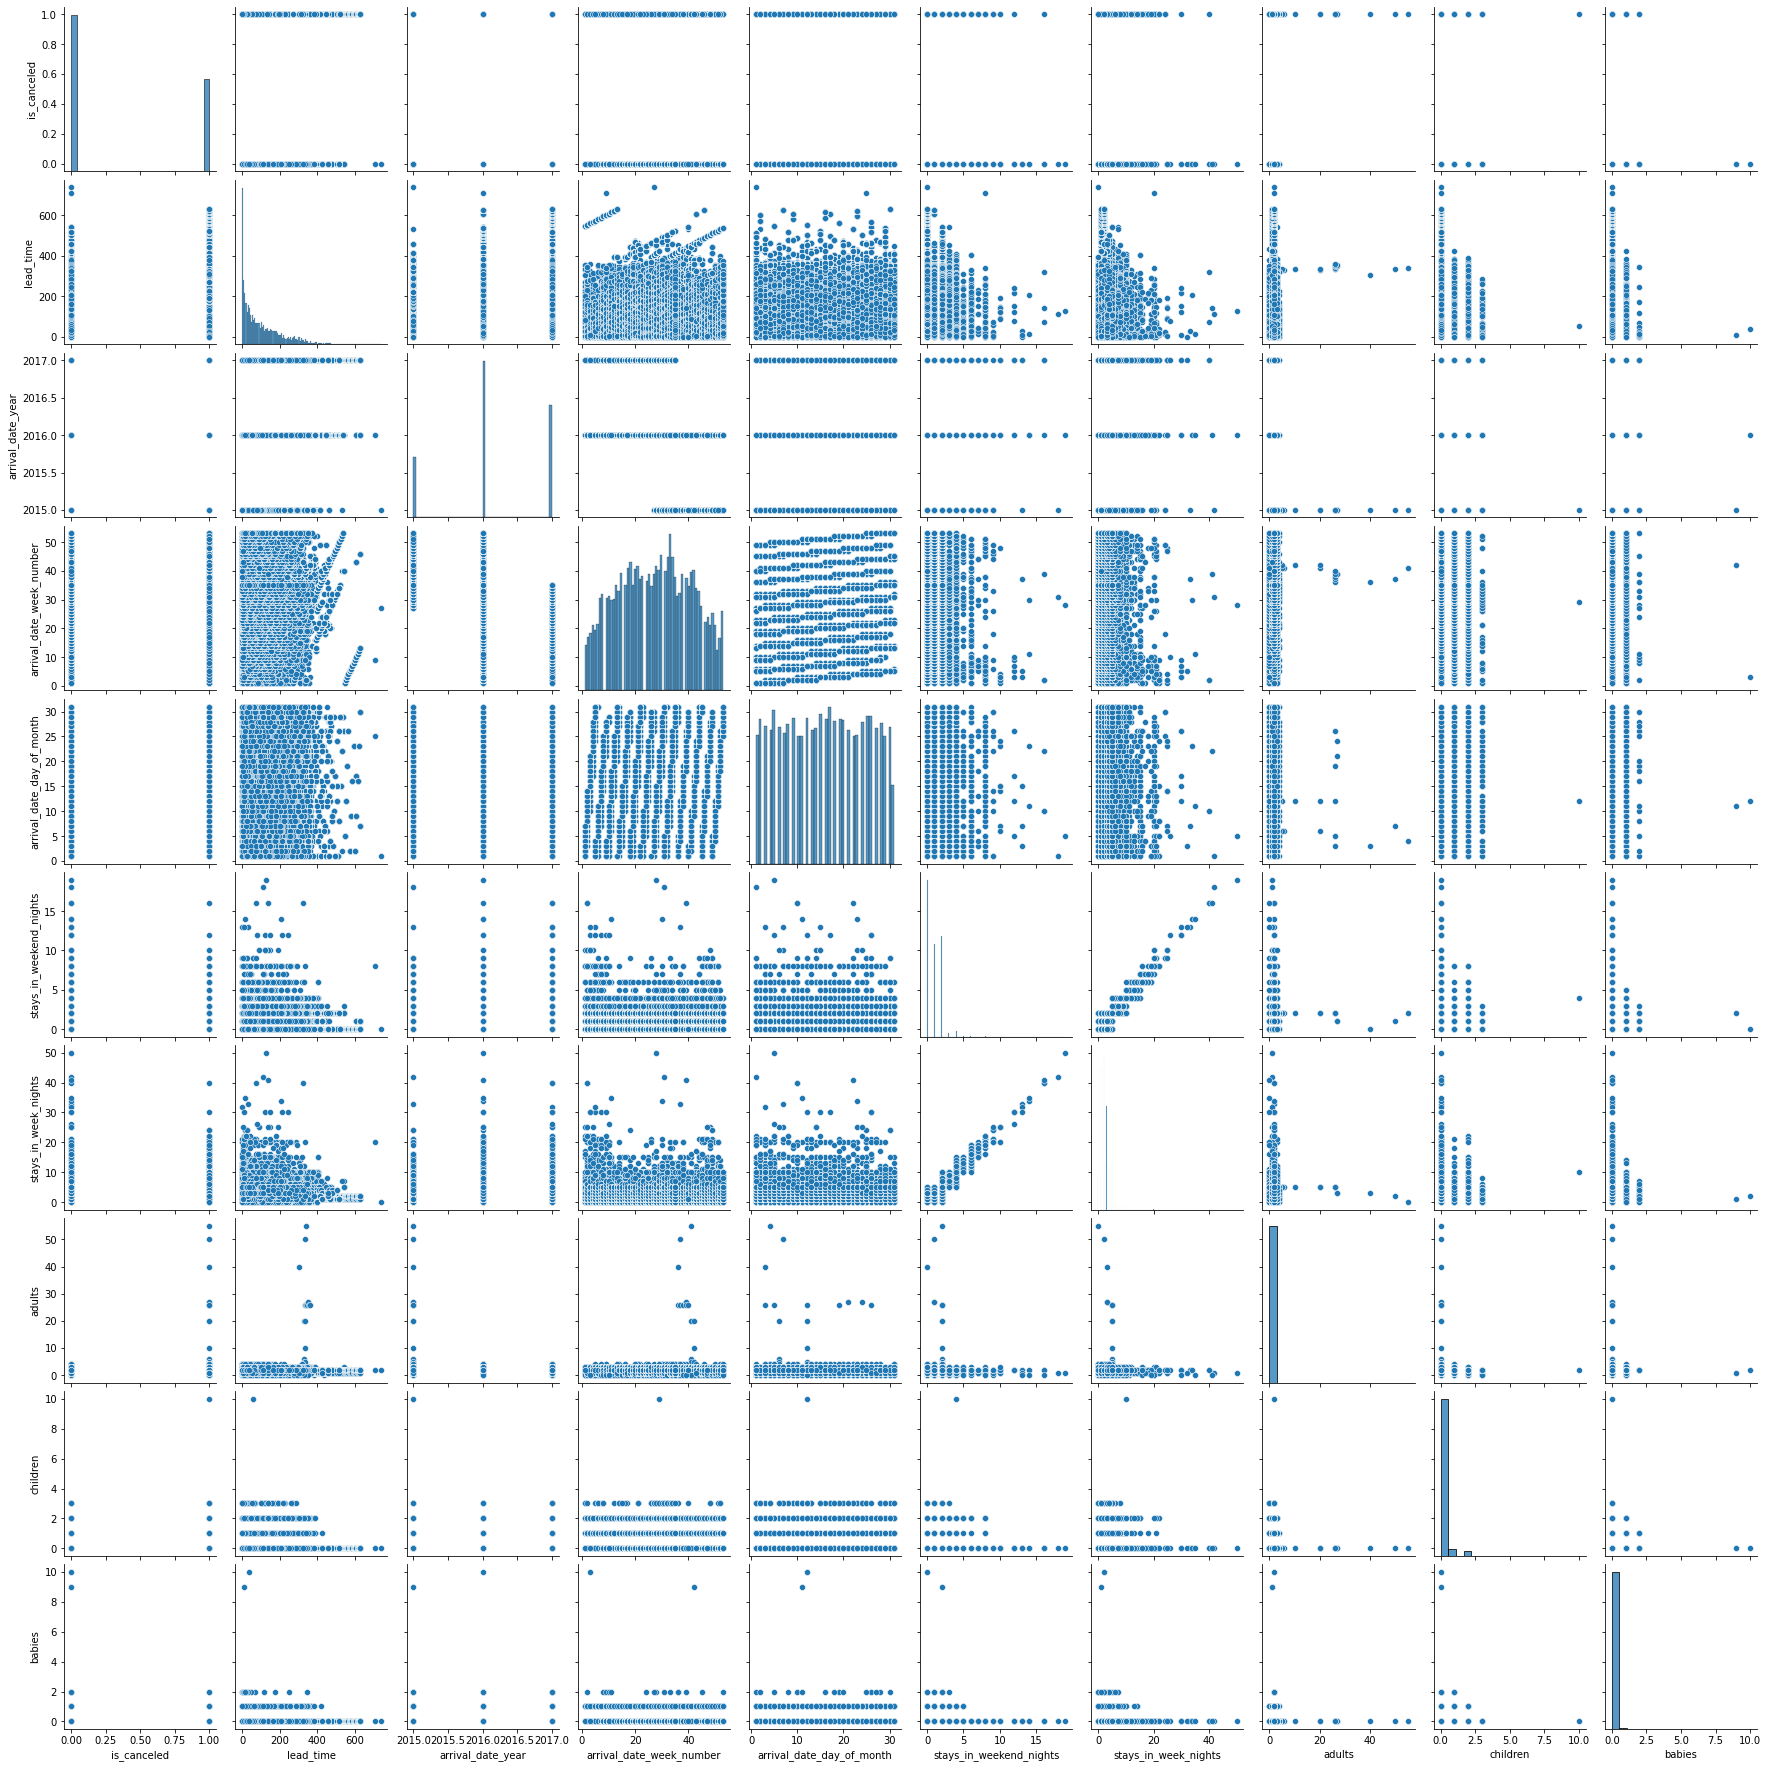

In [5]:
import seaborn as sns

# first half of the dataset's numeric features
sns.pairplot(hotel[hotel.describe().columns[:10]])

#categorical features: is_canceled

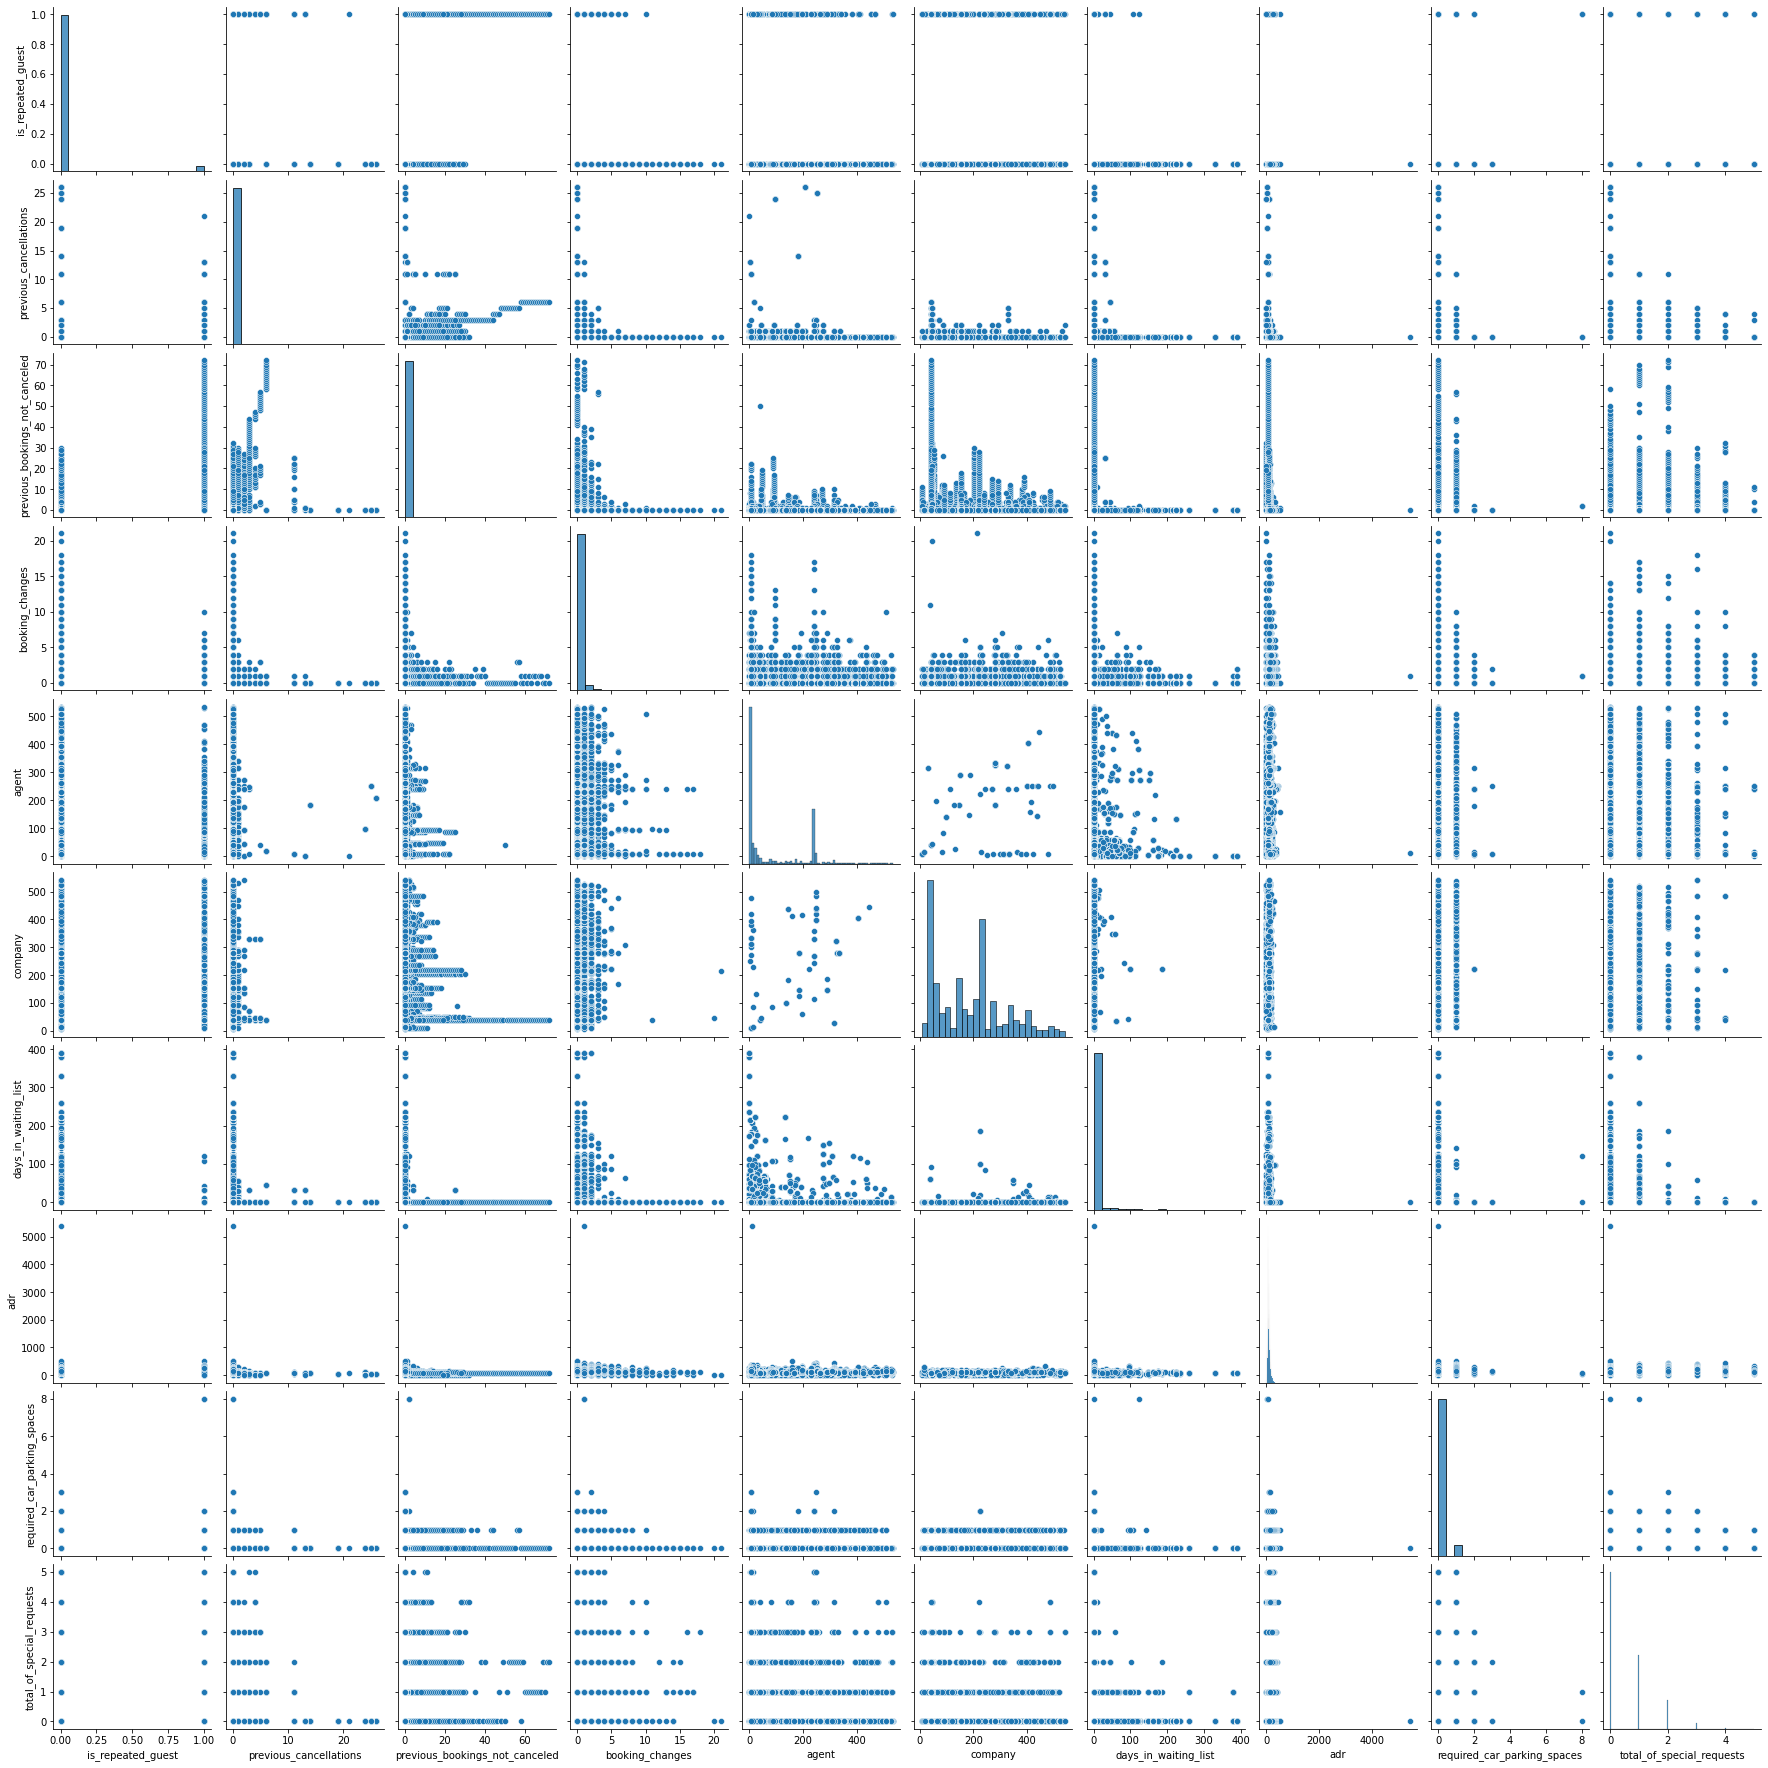

In [6]:
# second half of the dataset's numeric features
sns.pairplot(hotel[hotel.describe().columns[10:]])

At first glance:
* `is_canceled`: a boolean indicating whether the booking was canceled or not
* Several skewed variables

We will use `is_canceled` to as target variable, and the rest as features.

In [7]:
x = hotel.copy().drop(["is_canceled"], axis=1)
y = hotel.loc[:, "is_canceled"]

### Missing values: finding them and handling them

We will use the column transformer to handle missing values.

Parameters:
* `transformers`: list of tuples (name, transformer, column(s))
* `remainder`: ‘drop’, ‘passthrough’, or ‘raise’


In [8]:
hotel.isna().mean().sort_values(ascending=False)[:10]

# only 4 features are missing values

company                     0.943069
agent                       0.136862
country                     0.004087
children                    0.000034
lead_time                   0.000000
arrival_date_year           0.000000
arrival_date_month          0.000000
arrival_date_week_number    0.000000
is_canceled                 0.000000
market_segment              0.000000
dtype: float64

In [9]:
hotel["country"].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
MRT        1
DJI        1
GUY        1
LCA        1
UMI        1
Name: country, Length: 177, dtype: int64

In [10]:
hotel["children"].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [11]:
# let's start our column transformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

missing_data_transformer = ColumnTransformer(
    [
        (
            "fill_missing_values_with_zero", 
            SimpleImputer(strategy="constant", fill_value=0), 
            ["company", "agent"]
        ),
        (
            "fill_missing_values_with_string", 
            SimpleImputer(strategy="constant", fill_value="XXX"), 
            ["country"]
        ),
        (
            "fill_missing_values_with_median", 
            SimpleImputer(strategy="most_frequent"), 
            ["children"]
        )
    ],
    remainder="drop"

)

In [27]:
missing_data_transformer.fit_transform(hotel)

array([[0.0, 0.0, 'PRT', 0.0],
       [0.0, 0.0, 'PRT', 0.0],
       [0.0, 0.0, 'GBR', 0.0],
       ...,
       [0.0, 9.0, 'DEU', 0.0],
       [0.0, 89.0, 'GBR', 0.0],
       [0.0, 9.0, 'DEU', 0.0]], dtype=object)

In [30]:
missing_data_transformed = pd.DataFrame(
    missing_data_transformer.fit_transform(hotel),
    columns=["company", "agent", "country", "children"]
)

missing_data_transformed.isna().mean().sort_values(ascending=False)[:10] # no missing values!

children    0.0
country     0.0
agent       0.0
company     0.0
dtype: float64

In [13]:
missing_data_transformed.head()

,company,agent,country,children
0,0,0,PRT,0
1,0,0,PRT,0
2,0,0,GBR,0
3,0,304,GBR,0
4,0,240,GBR,0


In [14]:
missing_data_transformed.dtypes  # all converted to categories!

company     object
agent       object
country     object
children    object
dtype: object

In [15]:
hotel.loc[:, ["company", "agent", "country", "children"]] = missing_data_transformed

hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Transforming categorical columns

We have two main options for transforming categorical columns:
* `OneHotEncoder`: this encodes the categorical columns into binary columns, and we can use the `OneHotEncoder` to transform categorical columns into numerical columns.
* `OrdinalEncoder`: this encoder encodes the categorical columns into numerical columns, and we can use the `OrdinalEncoder` to transform categorical columns into numerical columns.

in our pipeline we will use the `OrdinalEncoder` to transform categorical columns into numerical columns.

In [34]:
list(hotel.select_dtypes(include=["object"]).columns)

['hotel',
 'arrival_date_month',
 'children',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'agent',
 'company',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [16]:
categorical_features = list(hotel.select_dtypes(include=["object"]).columns)

hotel[categorical_features].isna().mean()

hotel                      0.0
arrival_date_month         0.0
children                   0.0
meal                       0.0
country                    0.0
market_segment             0.0
distribution_channel       0.0
reserved_room_type         0.0
assigned_room_type         0.0
deposit_type               0.0
agent                      0.0
company                    0.0
customer_type              0.0
reservation_status         0.0
reservation_status_date    0.0
dtype: float64

In [39]:
len(categorical_features)

15

In [35]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

ord_encoder_transformer = ColumnTransformer(
    [
        (
            "ordinal_encoder", 
            OrdinalEncoder(), 
            categorical_features # all the columns
        )
    ], 
    remainder="drop"
)


In [36]:
ordinal_encoded_columns = pd.DataFrame(
    ord_encoder_transformer.fit_transform(hotel),
    columns=categorical_features
)

ordinal_encoded_columns.head()

,hotel,arrival_date_month,children,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,agent,company,customer_type,reservation_status,reservation_status_date
0,1.0,5.0,0.0,0.0,135.0,3.0,1.0,2.0,2.0,0.0,0.0,0.0,2.0,1.0,121.0
1,1.0,5.0,0.0,0.0,135.0,3.0,1.0,2.0,2.0,0.0,0.0,0.0,2.0,1.0,121.0
2,1.0,5.0,0.0,0.0,59.0,3.0,1.0,0.0,2.0,0.0,0.0,0.0,2.0,1.0,122.0
3,1.0,5.0,0.0,0.0,59.0,2.0,0.0,0.0,0.0,0.0,221.0,0.0,2.0,1.0,122.0
4,1.0,5.0,0.0,0.0,59.0,6.0,3.0,0.0,0.0,0.0,174.0,0.0,2.0,1.0,123.0


In [37]:
ordinal_encoded_columns.dtypes.value_counts() # all floats!

float64    15
dtype: int64

In [40]:
onehot_encoder_transformer.fit_transform(hotel[categorical_features])

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [41]:
onehot_encoder_transformer.get_feature_names()

['onehot_encoder__x0_City Hotel',
 'onehot_encoder__x0_Resort Hotel',
 'onehot_encoder__x1_April',
 'onehot_encoder__x1_August',
 'onehot_encoder__x1_December',
 'onehot_encoder__x1_February',
 'onehot_encoder__x1_January',
 'onehot_encoder__x1_July',
 'onehot_encoder__x1_June',
 'onehot_encoder__x1_March',
 'onehot_encoder__x1_May',
 'onehot_encoder__x1_November',
 'onehot_encoder__x1_October',
 'onehot_encoder__x1_September',
 'onehot_encoder__x2_0.0',
 'onehot_encoder__x2_1.0',
 'onehot_encoder__x2_2.0',
 'onehot_encoder__x2_3.0',
 'onehot_encoder__x2_10.0',
 'onehot_encoder__x3_BB',
 'onehot_encoder__x3_FB',
 'onehot_encoder__x3_HB',
 'onehot_encoder__x3_SC',
 'onehot_encoder__x3_Undefined',
 'onehot_encoder__x4_ABW',
 'onehot_encoder__x4_AGO',
 'onehot_encoder__x4_AIA',
 'onehot_encoder__x4_ALB',
 'onehot_encoder__x4_AND',
 'onehot_encoder__x4_ARE',
 'onehot_encoder__x4_ARG',
 'onehot_encoder__x4_ARM',
 'onehot_encoder__x4_ASM',
 'onehot_encoder__x4_ATA',
 'onehot_encoder__x4_ATF'

In [38]:
# one hot encoding
onehot_encoder_transformer = ColumnTransformer(
    transformers=[
        (
            "onehot_encoder", 
            OneHotEncoder(sparse=False), # 
            categorical_features
        )
    ], 
    remainder="drop"
)

onehot_encoded_columns = pd.DataFrame(
    onehot_encoder_transformer.fit_transform(hotel[categorical_features]),
    columns=onehot_encoder_transformer.get_feature_names()
)

onehot_encoded_columns # this is the problem with the one hot encoding

,onehot_encoder__x0_City Hotel,onehot_encoder__x0_Resort Hotel,onehot_encoder__x1_April,onehot_encoder__x1_August,onehot_encoder__x1_December,onehot_encoder__x1_February,onehot_encoder__x1_January,onehot_encoder__x1_July,onehot_encoder__x1_June,onehot_encoder__x1_March,...,onehot_encoder__x14_2017-09-03,onehot_encoder__x14_2017-09-04,onehot_encoder__x14_2017-09-05,onehot_encoder__x14_2017-09-06,onehot_encoder__x14_2017-09-07,onehot_encoder__x14_2017-09-08,onehot_encoder__x14_2017-09-09,onehot_encoder__x14_2017-09-10,onehot_encoder__x14_2017-09-12,onehot_encoder__x14_2017-09-14
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
119386,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
119387,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
119388,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Transforming numerical columns: scaling

We will use `MinMaxScaler` to scale the numerical columns.

But not all of them, only the ones that were not categorical and then transformed!

In [42]:
numerical_features_to_scale = list(set(hotel.columns) - set(categorical_features))

numerical_features_to_scale.remove("is_canceled") # we don't want to scale this one, it's the categorical target

numerical_features_to_scale

['arrival_date_week_number',
 'arrival_date_day_of_month',
 'days_in_waiting_list',
 'previous_bookings_not_canceled',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'arrival_date_year',
 'lead_time',
 'stays_in_week_nights',
 'adults',
 'total_of_special_requests',
 'required_car_parking_spaces',
 'adr',
 'booking_changes',
 'stays_in_weekend_nights']

In [22]:
from sklearn.preprocessing import MinMaxScaler

minmax_transformer = ColumnTransformer(
    [
        (
            "minmax_scaler",
            MinMaxScaler(),
            list(numerical_features_to_scale)
        )
    ],
    remainder="drop"
)

In [43]:
scaled_dataset = pd.DataFrame(
    minmax_transformer.fit_transform(hotel),
    columns=numerical_features_to_scale
)

scaled_dataset.head()

,arrival_date_week_number,arrival_date_day_of_month,days_in_waiting_list,previous_bookings_not_canceled,babies,is_repeated_guest,previous_cancellations,arrival_date_year,lead_time,stays_in_week_nights,adults,total_of_special_requests,required_car_parking_spaces,adr,booking_changes,stays_in_weekend_nights
0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.464043,0.00,0.036364,0.0,0.0,0.001180,0.142857,0.0
1,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.00,0.036364,0.0,0.0,0.001180,0.190476,0.0
2,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009498,0.02,0.018182,0.0,0.0,0.015053,0.000000,0.0
3,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017639,0.02,0.018182,0.0,0.0,0.015053,0.000000,0.0
4,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018996,0.04,0.036364,0.2,0.0,0.019307,0.000000,0.0


Now we have several independent transformations:
* We removed the missing values and replaced them with different options according to the column
* We transformed categorical columns into numerical columns
* We scaled the numerical columns

Next, we link every transformation with the train-predict-evaluate cycle.

In [24]:
cat_string_columns_missing = ["country"]
cat_numeric_columns_missing = ["company", "agent"]
numeric_columns_missing = ["children"]
cat_columns_to_encode = categorical_features
numeric_columns_to_scale = numerical_features_to_scale

# convert column names to indices in the original data
cat_string_columns_missing_idx = [x.columns.get_loc(col) for col in cat_string_columns_missing]
cat_numeric_columns_missing_idx = [x.columns.get_loc(col) for col in cat_numeric_columns_missing]
numeric_columns_missing_idx = [x.columns.get_loc(col) for col in numeric_columns_missing]
cat_columns_to_encode_idx = [x.columns.get_loc(col) for col in cat_columns_to_encode]
numeric_columns_to_scale_idx = [x.columns.get_loc(col) for col in numeric_columns_to_scale]


In [47]:
cat_string_columns_missing_idx

[12]

In [44]:
#  setting up the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        (
            "cat_string_columns_fillna_XXX", 
            SimpleImputer(strategy="constant", fill_value="XXX"), 
            cat_string_columns_missing_idx
        ),
        (
            "cat_numeric_columns_fillna_0", 
            SimpleImputer(strategy="constant", fill_value=0), 
            cat_numeric_columns_missing_idx
        ),
        (
            "numeric_columns_fillna_mode", 
            SimpleImputer(strategy="most_frequent"), 
            numeric_columns_missing_idx
        ),
        (
            "cat_columns_to_encode", 
            OrdinalEncoder(), 
            cat_columns_to_encode_idx
        ),
        (
            "numeric_columns_to_scale", 
            MinMaxScaler(), 
            numeric_columns_to_scale_idx
        )
    ],
    remainder="passthrough"
)

In [45]:
print(preprocessor.fit_transform(x).shape)
print(x.shape)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

The problem with `ColumnTransformer` is that it applies the transformations in parallel, meaning that if you want to transform the same column more than once, you'll have it repeated in the final result.

We can avoid this with `Pipeline` objects.

### Pipeline

Now that we have build several transformations, we can link them with the train-predict-evaluate cycle using the `Pipeline` object and an estimator from sklearn. 

The `Pipeline` object computes each step sequentially, not in parallel, allowing us to avoid repeating the same transformations in the final result.


Let's summarize some transformations to apply:
* Remove the missing values
    * Use `most_frequent` to replace the missing values in categorical columns
    * Use `median` to replace the missing values in numerical columns
* Transform categorical columns with `OneHotEncoder`
* Scale the numerical columns

In [48]:
# let's first separate features
categorical_features = list(x.select_dtypes(include=["object"]).columns)
numerical_features = list(x.select_dtypes(include=["float64", "int64"]).columns)

print(len(categorical_features)+len(numerical_features))
print(len(x.columns))

31
31


In [50]:
from sklearn import set_config

set_config("diagram")

In [52]:
from sklearn.pipeline import Pipeline

# Define categorical pipeline
cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(sparse=False, handle_unknown="ignore"))
])

# Define numerical pipeline
num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler())
])

# Fit column transformer to training data
preprocessor = ColumnTransformer(
    transformer=[
        ("cat", cat_pipe, categorical_features),
        ("num", num_pipe, numerical_features)
    ],
)

preprocessor.fit(x)

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['hotel', 'arrival_date_month', 'meal',
                                  'country', 'market_segment',
                                  'distribution_channel', 'reserved_room_type',
                                  'assigned_room_type', 'deposit_type',
                                  'customer_type', 'reservation_stat...
                                 ['lead_time', 'arrival_date_year',
                                  'arrival_date_week_number',
                                  'arrival_date_day_of_month',
                      

In [53]:
x_preprocessed = preprocessor.transform(x)

x_preprocessed.shape 

(119390, 1186)

By linking pipelines within our ColumnTransformer, we can avoid repeating the same transformations in the final result.

In [ ]:
pipe = Pipeline(
    ("preprocessor", preprocessor),
    ("algo", LogisticRegression())
)

pipe.fit(x_train, y_train)

y_hat = pipe.predict(x_test)

### Using pipelines to preprocess and then train and predict

With out brand new preprocessor, we can include that in a bigger pipeline that connects the preprocessing with the train-predict-evaluate cycle.

In [54]:
# train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [57]:
hotel["is_canceled"].unique()

array([0, 1])

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Fit a pipeline with transformers and an estimator to the training data
pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(random_state=42))
])

pipe.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['hotel',
                                                   'arrival_date_month', 'meal',
                                                   'country', 'market_segment',
                                                   'distribution_channel',
                                                   'reserved_room_type',
                                                   'assigned_room_type'

In [59]:
# Predict training data
y_train_pred = pipe.predict(x_train)
acc_train = accuracy_score(y_train, y_train_pred)

print(f"Accuracy on training data: {acc_train}")


Accuracy on training data: 1.0


In [60]:
# Predict test data
y_test_pred = pipe.predict(x_test)
acc_test = accuracy_score(y_test, y_test_pred)

print(f"Accuracy on test data: {acc_test}") # too good to be true, but its a good lesson

Accuracy on test data: 1.0
